# Análisis de Multiplicación de Arreglos en Python y NumPy

Este código implementa la multiplicación de arreglos en una y dos dimensiones, comparando su eficiencia usando **Python puro** y la biblioteca **NumPy**.

Adicionalmente, se utilizan las siguientes bibliotecas:
- **`time`**: Para medir el rendimiento de cada multiplicación.
- **`matplotlib`**: Para graficar los resultados.
- **`pandas`**: Para visualizar los resultados en formato de tabla.

El objetivo es evaluar la diferencia de rendimiento entre la implementación con Python puro y la optimización que ofrece NumPy.


Tabla de Resultados:
  Tipo  Tamaño  Tiempo_Python  Tiempo_NumPy
0   1D      10       0.000002      0.000002
1   1D      50       0.000003      0.000001
2   1D     100       0.000006      0.000002
3   1D     200       0.000016      0.000002
4   1D     500       0.000036      0.000002
5   2D      10       0.000011      0.000001
6   2D      50       0.000582      0.000285
7   2D     100       0.001624      0.000007
8   2D     200       0.004365      0.000170
9   2D     500       0.030059      0.000540


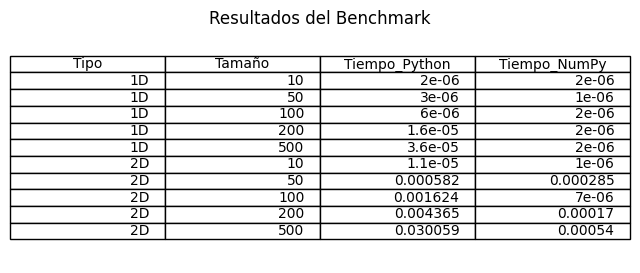

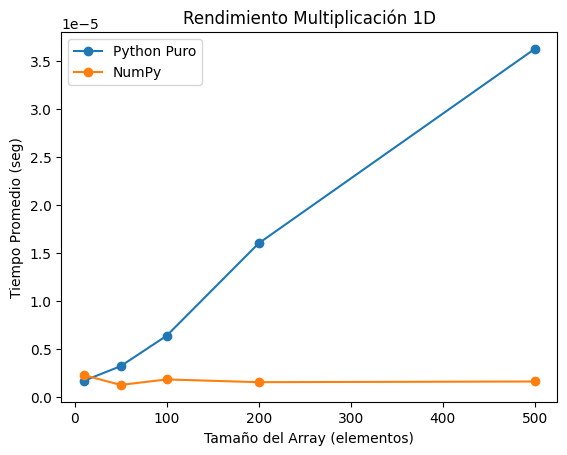

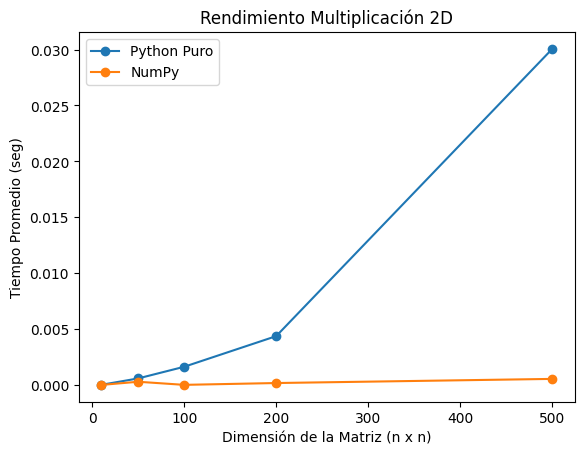

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------
# Funciones de multiplicación
# ------------------------------

# Multiplicación elemento a elemento de 1-D con Python puro (listas)
def multiply_1d_python(a, b):
    result = []
    for i in range(len(a)):
        result.append(a[i] * b[i])
    return result

# Multiplicación elemento a elemento de 2-D con Python puro (listas de listas)
def multiply_2d_python(A, B):
    result = []
    for i in range(len(A)):
        row = []
        for j in range(len(A[0])):
            row.append(A[i][j] * B[i][j])
        result.append(row)
    return result

# Multiplicación usando NumPy para 1-D y 2-D (operación elemento a elemento)
def multiply_1d_numpy(a, b):
    return a * b

def multiply_2d_numpy(A, B):
    return A * B

# ------------------------------
# Función de Benchmarking
# ------------------------------
def benchmark_function(func, *args, iterations=10):
    times = []
    for _ in range(iterations):
        start = time.time()
        func(*args)
        times.append(time.time() - start)
    return np.mean(times)

# ------------------------------
# Configuración de tamaños de arrays
# ------------------------------
sizes_1d = [10, 50, 100, 200, 500]
sizes_2d = [10, 50, 100, 200, 500]

results = []

# Benchmark para arrays 1-D
for n in sizes_1d:
    # Crear arrays: para Python se usan listas; para NumPy se usan arrays
    arr1_numpy = np.random.rand(n)
    arr2_numpy = np.random.rand(n)
    arr1_python = arr1_numpy.tolist()
    arr2_python = arr2_numpy.tolist()

    time_python = benchmark_function(multiply_1d_python, arr1_python, arr2_python)
    time_numpy = benchmark_function(multiply_1d_numpy, arr1_numpy, arr2_numpy)

    results.append({
        'Tipo': '1D',
        'Tamaño': n,
        'Tiempo_Python': time_python,
        'Tiempo_NumPy': time_numpy
    })

# Benchmark para arrays 2-D (matrices n x n)
for n in sizes_2d:
    arr1_numpy = np.random.rand(n, n)
    arr2_numpy = np.random.rand(n, n)
    arr1_python = arr1_numpy.tolist()
    arr2_python = arr2_numpy.tolist()

    time_python = benchmark_function(multiply_2d_python, arr1_python, arr2_python)
    time_numpy = benchmark_function(multiply_2d_numpy, arr1_numpy, arr2_numpy)

    results.append({
        'Tipo': '2D',
        'Tamaño': n,
        'Tiempo_Python': time_python,
        'Tiempo_NumPy': time_numpy
    })

# ------------------------------
# Crear tabla resumen con Pandas
# ------------------------------
df_results = pd.DataFrame(results)
print("Tabla de Resultados:")
print(df_results)

# Guardar la tabla como CSV para reportes
df_results.to_csv("benchmark_results.csv", index=False)

# Guardar la tabla como imagen usando matplotlib
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_results.round(6).values, colLabels=df_results.columns, loc='center')
plt.title("Resultados del Benchmark")
plt.savefig("benchmark_results_table.png")
plt.show()

# ------------------------------
# Visualización: Gráficos de Línea
# ------------------------------
# Separar datos para 1-D y 2-D
df_1d = df_results[df_results['Tipo'] == '1D']
df_2d = df_results[df_results['Tipo'] == '2D']

# Gráfico para arrays 1-D
plt.figure()
plt.plot(df_1d['Tamaño'], df_1d['Tiempo_Python'], marker='o', label='Python Puro')
plt.plot(df_1d['Tamaño'], df_1d['Tiempo_NumPy'], marker='o', label='NumPy')
plt.xlabel("Tamaño del Array (elementos)")
plt.ylabel("Tiempo Promedio (seg)")
plt.title("Rendimiento Multiplicación 1D")
plt.legend()
plt.savefig("1d_performance.png")
plt.show()

# Gráfico para arrays 2-D
plt.figure()
plt.plot(df_2d['Tamaño'], df_2d['Tiempo_Python'], marker='o', label='Python Puro')
plt.plot(df_2d['Tamaño'], df_2d['Tiempo_NumPy'], marker='o', label='NumPy')
plt.xlabel("Dimensión de la Matriz (n x n)")
plt.ylabel("Tiempo Promedio (seg)")
plt.title("Rendimiento Multiplicación 2D")
plt.legend()
plt.savefig("2d_performance.png")
plt.show()
